In [1]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/GaussFit_spec2D.py
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_info = gen_dataInfo_from_tfCube()

redshift : 0.6
half_light_radius : 0.5
vcirc : 200.0
sini : 1.0
slitWidth : 0.02


returning:
lambda, observation, model, sky (the last three are (npix, npix, nspax) datacubes)
total tfCube time: 4.944703817367554 (sec)
total getSlitSpectra time: 1.3481817245483398 (sec)


In [3]:
GaussFit = GaussFit_spec2D(data_info)

time cost in gaussFit_spec2D: 0.18676185607910156 (secs)


In [13]:
fitted_peakLambda, fitted_amp, fitted_sigma = GaussFit.gaussFit_spec2D(data=GaussFit.data)

model = GaussFit.model_spec2D(fitted_peakLambda,fitted_amp,fitted_sigma)

time cost in gaussFit_spec2D: 0.19626760482788086 (secs)


In [5]:
data = GaussFit.data

In [15]:
4.83+4+2+0.75+0.67

12.25

In [6]:
lambda_min = np.min(GaussFit.grid_lambda)  ; lambda_MAX = np.max(GaussFit.grid_lambda)
x_min = np.min(GaussFit.grid_pos)          ; x_MAX = np.max(GaussFit.grid_pos)

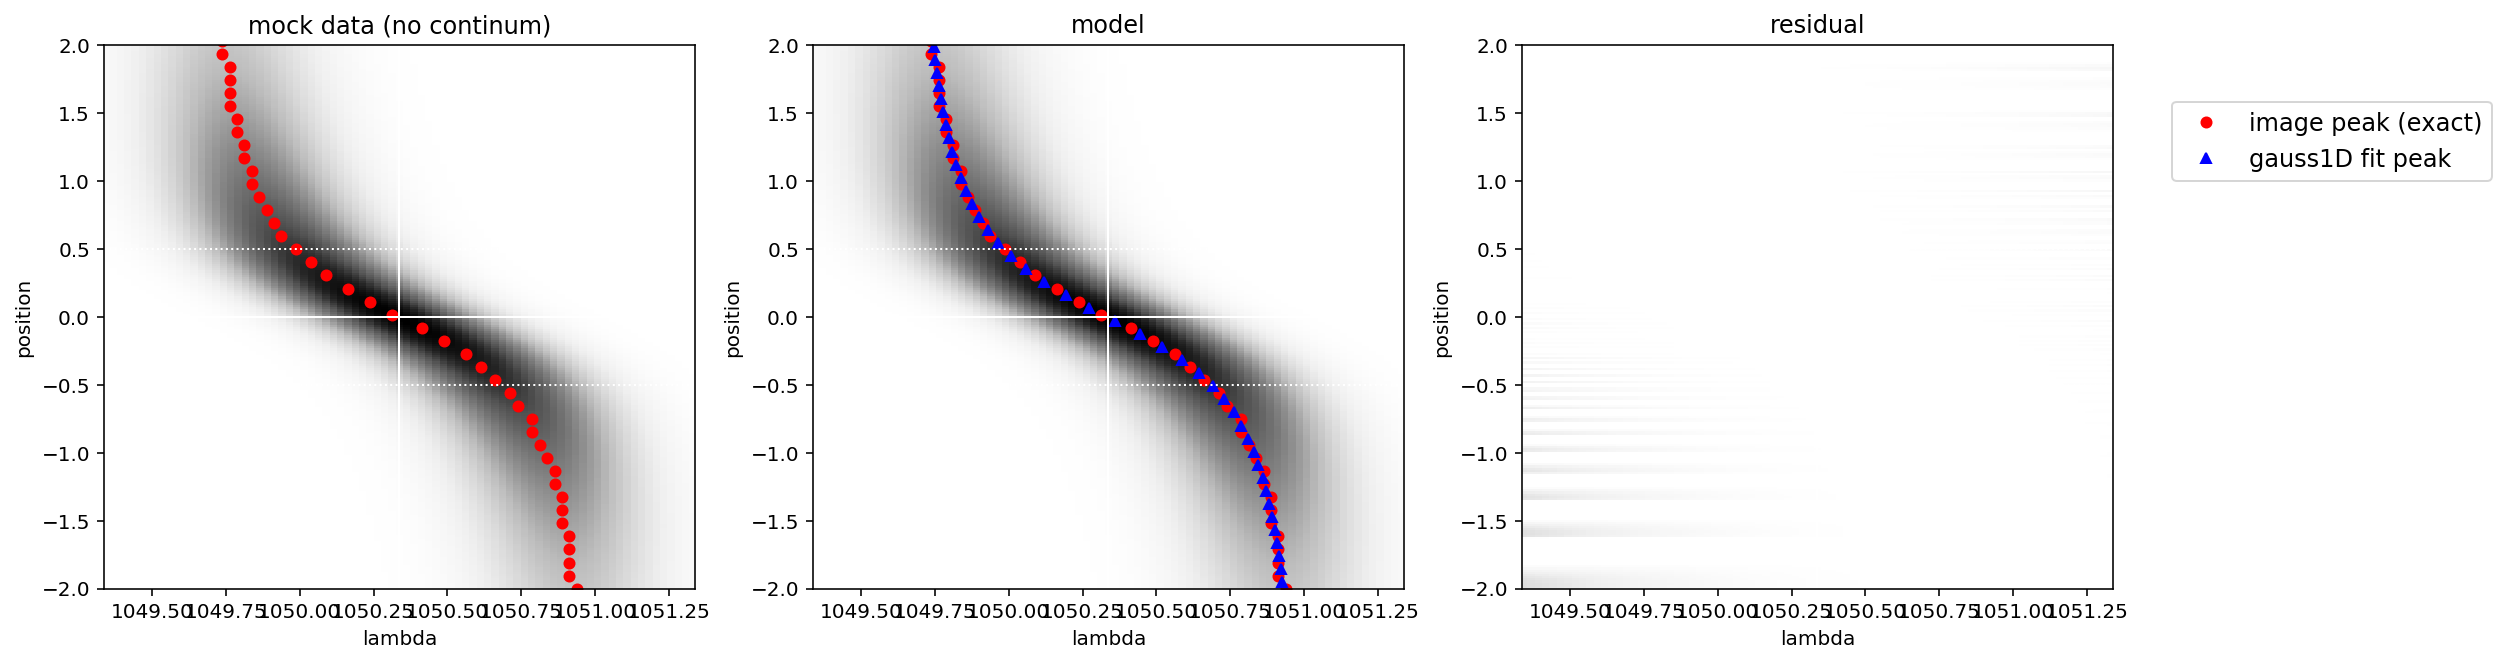

In [12]:
#%matplotlib
%matplotlib inline

ncol=3

fig,ax = plt.subplots(1,ncol,figsize=(18,5))
#ax[0].imshow(np.sum(modelGrid,axis=2))
ax[0].imshow(data ,extent=[lambda_min, lambda_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[1].imshow(model,extent=[lambda_min, lambda_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[2].imshow((data-model)/data,extent=[lambda_min, lambda_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)

ax[0].plot(GaussFit.peak_info_exact['peak_loc'][::6]         ,np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none')

ax[1].plot(GaussFit.peak_info_exact['peak_loc'][::6]         ,np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none',label='image peak (exact)')
ax[1].plot(fitted_peakLambda[3::6]            ,np.flip(GaussFit.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none',label='gauss1D fit peak')
#ax[1].plot(GaussFit.fitted_rot_lambdaObs[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none',label='bestfit rot lambdaObs based on peakLambda')
#ax[1].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none',label='fiducial')


#ax[2].plot(peak_info['peak_loc'][::6],np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none')
#ax[2].plot(fitted_peakLoc[3::6]       ,np.flip(GaussFit.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none')
#ax[2].plot(GaussFit.approxFit_rot_lambda_peak[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none')
#ax[2].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none')


vcen = data_info['lambda_emit']*(1.+data_info['par_fid']['redshift'])

for j in range(ncol):
    ax[j].axhline(y=0.0,color='white', linestyle='-',lw=1)
    ax[j].axhline(y=0.5,color='white', linestyle=':',lw=1)
    ax[j].axhline(y=-0.5,color='white', linestyle=':',lw=1)
    ax[j].axvline(x=vcen,color='white', linestyle='-',lw=1)
    #ax[j].axvline(x=vcen+100,color='white', linestyle=':',lw=1)
    #ax[j].axvline(x=vcen-100,color='white', linestyle=':',lw=1)
    #ax[j].axvline(x=vcen+200,color='white', linestyle=':',lw=1)
    #ax[j].axvline(x=vcen-200,color='white', linestyle=':',lw=1)
    
    ax[j].set_xlim(vcen-1.0,vcen+1.0)
    ax[j].set_ylim(-2,2)
    ax[j].set_xlabel('lambda')
    ax[j].set_ylabel('position')
    
ax[0].set_title('mock data (no continum)')
ax[1].set_title('model')
ax[2].set_title('residual')

ax[1].legend(loc=(2.3,0.75),prop={'size':12})

plt.show()

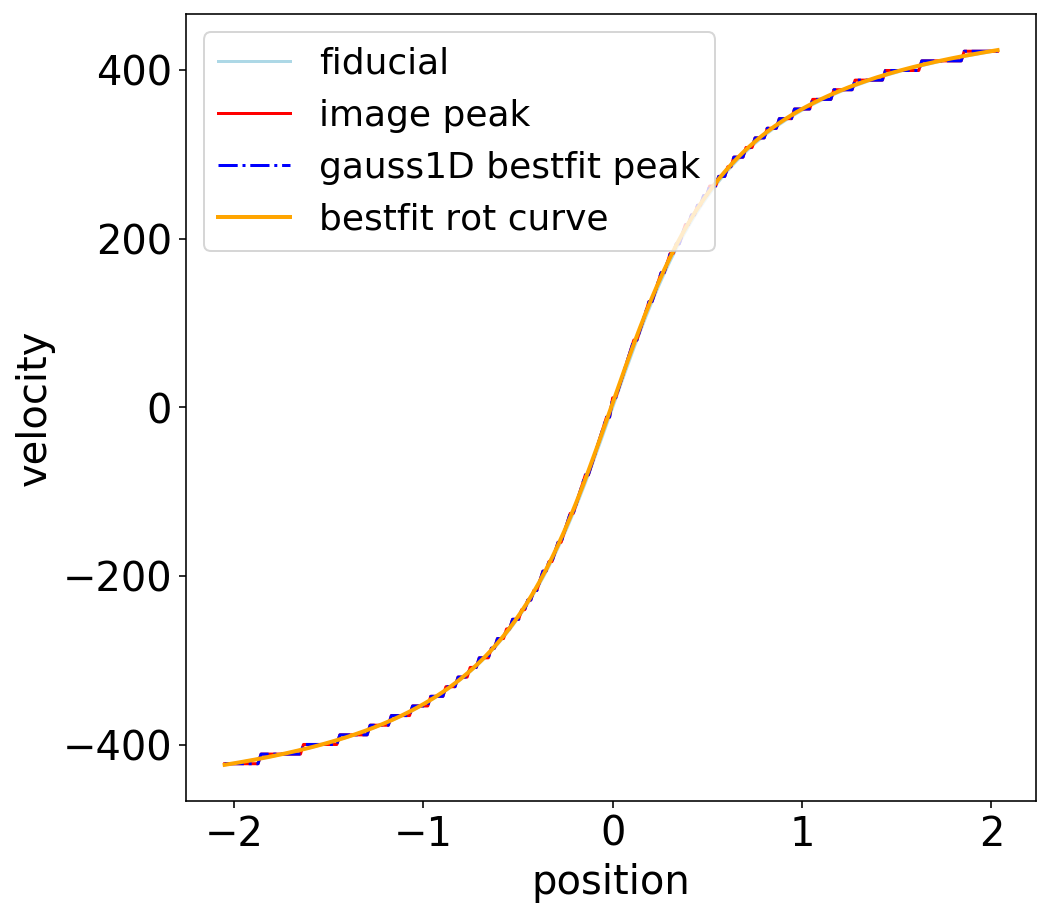

In [19]:
fig = plt.figure(figsize=(7.2,6.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.16,0.11,0.82,0.84])

ax1.plot(fit_tool.grid_pos,fid_rot_v_peak-v_sys0,label='fiducial',color='lightblue')
ax1.plot(fit_tool.grid_pos,v_image_peak,label='image peak',color='red')
ax1.plot(fit_tool.grid_pos,v_image_peak,label='gauss1D bestfit peak',color='blue',ls="-.")
ax1.plot(fit_tool.grid_pos,fit_tool.approxFit_rot_v_peak-v_sys0,label='bestfit rot curve',color='orange',lw=2)


ax1.set_xlabel('position')
ax1.set_ylabel('velocity')

ax1.legend(loc='best',prop={'size':18})

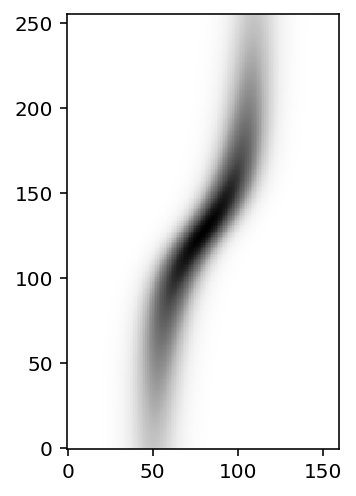

In [17]:
%matplotlib inline
plt.imshow(data_info['data'],cmap=plt.cm.Greys,origin="lower")